# House price prediction

In this dataset, there are information about seventy nine feature variables. These varibles contain both categorical and numerical variables. The goal is to predict the house price with these information.

### Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train1=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2]:
train=train1.set_index('Id')
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Following are some numerical variables in the dataset

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

BsmtExposure: Refers to walkout or garden level walls

#### Following are some categorical variables of the dataset

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to 
                     building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	    Electricity only	

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family  
                dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

#### There are two date variables in the dataset

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#### NA is a different category for follwing four attributes

Alley: Type of alley access to property
    
    NA - No alley access
    
BsmtQual: Evaluates the height of the basement
    
     NA -  No Basement
     
BsmtCond: Evaluates the general condition of the basement

     NA	-   No Basement


The NA values for above attributes can be replaced by 'None'

In [3]:
train.loc[:,['Alley','MasVnrType','BsmtQual','BsmtCond']]=train.loc[:,['Alley','MasVnrType','BsmtQual','BsmtCond']].fillna('None')

In [4]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
num_var=train.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],axis=1)

In [6]:
num_var.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


There are thirty seven numerical variables in the dataset with the dependent variable 'SalePrice'

In [7]:
numerical_variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

In [8]:
cat_var=train.loc[:,['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
cat_var.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


There are fourty three categorical variables in the dataset.

In [9]:
categorical_variables= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

#### Replacing NaN values in numerical data

In [10]:
nan_values=num_var.isna()
nan_columns=nan_values.any()
col_nan=num_var.columns[nan_columns].tolist()
col_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

'LotFrontage' , 'MasVnrArea' and 'GarageYrBlt' attributes contains NaN values in the dataset.

In [11]:
num_var['LotFrontage'].isna().sum()

259

'LotFrontage' contains 259 NaN values.

In [12]:
num_var['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

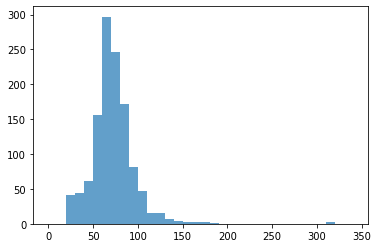

In [13]:
plt.figure()
plt.hist(num_var['LotFrontage'], alpha=0.7, bins=np.arange(0,350,10), label='LotFrontage');

The data are right-skewed. Median can be used to replace the NaN values

In [14]:
num_var['LotFrontage']=num_var['LotFrontage'].fillna(num_var['LotFrontage'].median())

In [15]:
num_var['GarageYrBlt'].isna().sum()

81

'GarageYrBlt' contains 81 NaN values.

In [16]:
num_var['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

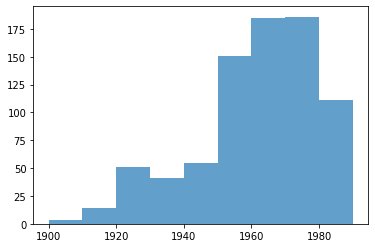

In [17]:
plt.figure()
plt.hist(num_var['GarageYrBlt'], alpha=0.7, bins=np.arange(1900,2000,10), label='GarageYrBlt');

The data are left skewed. Therfore, median can be used to replace the NaN values.

In [44]:
num_var['GarageYrBlt']=num_var['GarageYrBlt'].fillna(num_var['LotFrontage'].median())

In [18]:
num_var['MasVnrArea'].isna().sum()

8

'MasVnrArea' has 8 NaN values.

In [19]:
num_var['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

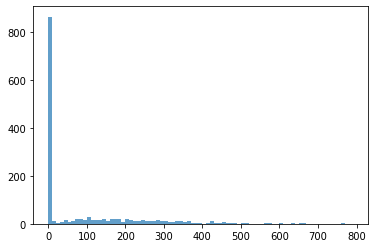

In [20]:
plt.figure()
plt.hist(num_var['MasVnrArea'], alpha=0.7, bins=np.arange(0,800,10), label='MasVnrArea');

Data contains many zero values. Therefore, NaN values can be replaced by zero

In [21]:
num_var['MasVnrArea']=num_var['MasVnrArea'].fillna(0)

### Exploratory Data Analysis

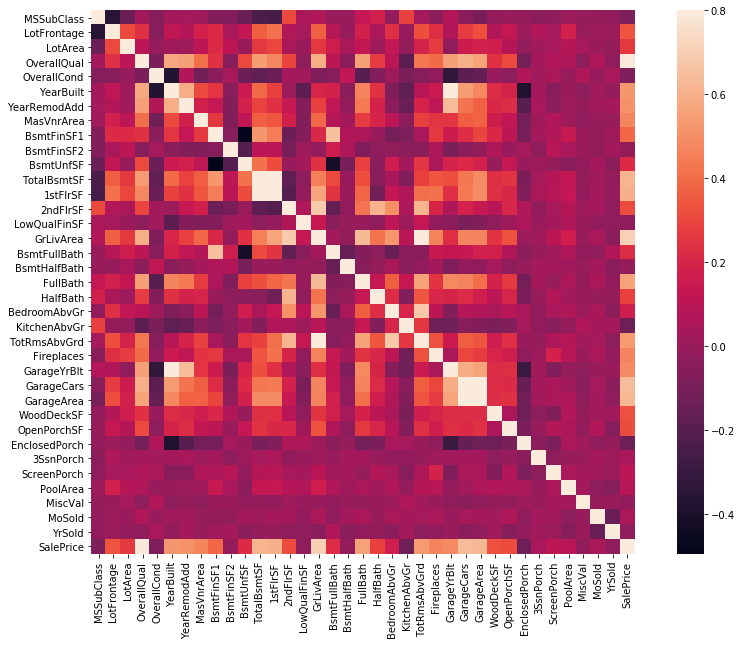

In [22]:
plt.figure(figsize=(15,10))
nv_corr_heat = sns.heatmap(num_var.corr(), vmax=.8, square=True)

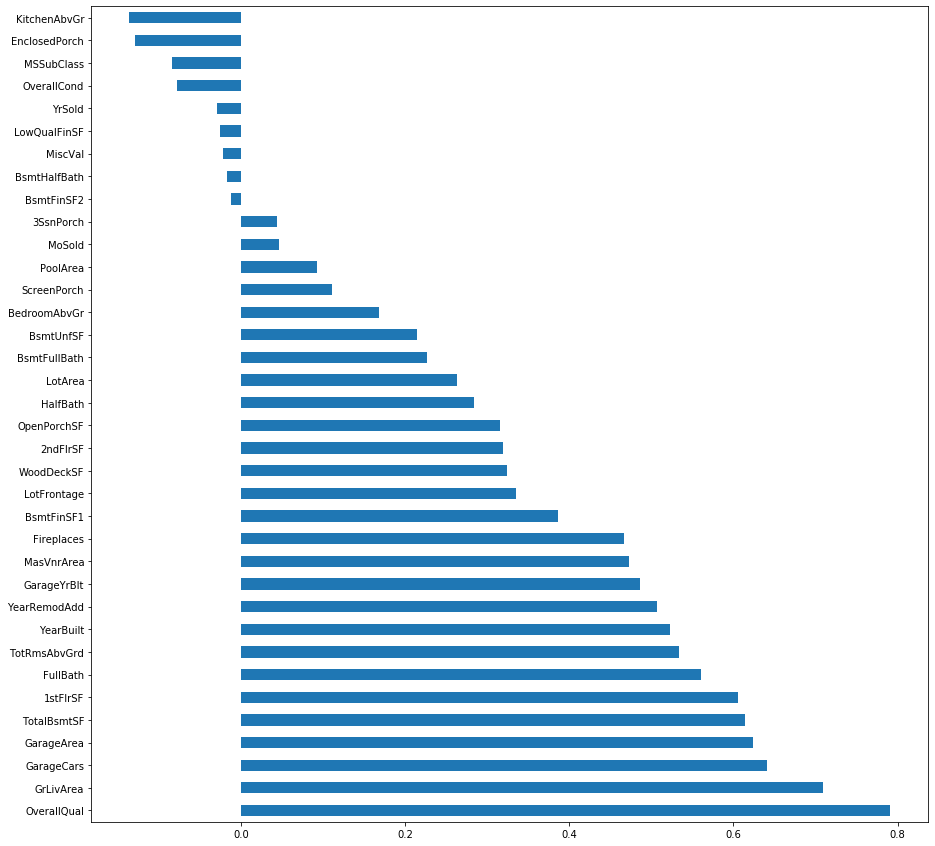

In [23]:
plt.figure(figsize=(15,15))
(num_var.corr()
     .SalePrice
     .drop('SalePrice')
     .sort_values(ascending=False)
     .plot
     .barh())

According to the above visualizations, 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF', 'FullBath','TotRmsAbvGrd', 'YearBuilt' are the highly correlated variables with 'SalePrice'

In [24]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

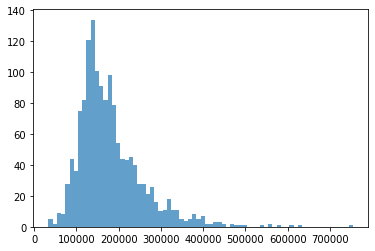

In [25]:
plt.figure()
plt.hist(train['SalePrice'], alpha=0.7, bins=np.arange(34000,760000,10000));

This is the histogram of 'SalePrice'.

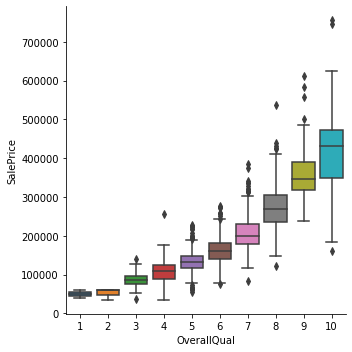

In [32]:
sns.catplot(x='OverallQual', y='SalePrice',kind='box',data=train)

#### This is how the sale price of a house changes with overal quality. 'OvqrallQual' attribute represents the quality of overall material and finish of the house. The sales price increases when the quality of the house increases. 'OverallQual' attribute is the most correlated attribute with the sale prce.

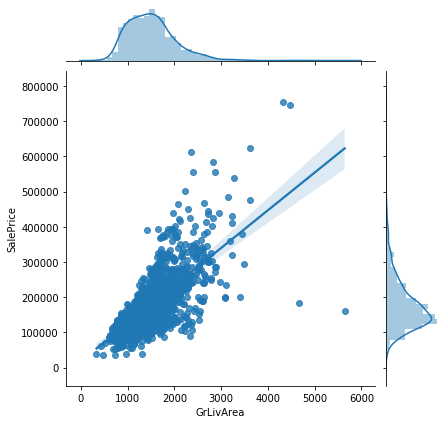

In [26]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'],kind='reg')

#### This plot shows the relationship between 'GrLivArea' and 'SalePrice'. 'GrLivArea' represents the above ground living area in square feet.There is a positive correlation between 'GrLiveArea' and 'SalePrice' and there are few outliers in the plot.

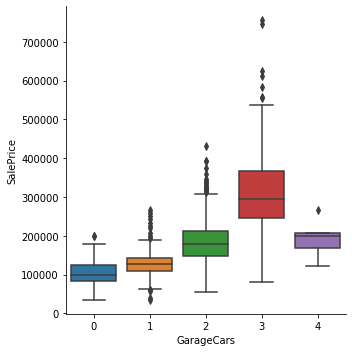

In [33]:
sns.catplot(x='GarageCars', y='SalePrice',kind='box',data=train)

#### 'GarageCars' represents the size of garage in car capacity. The sale price increases when the size of the garage increases from 0 to 3, but when the size increases to 4 there is a decrease in the price. This can be an outlier. 

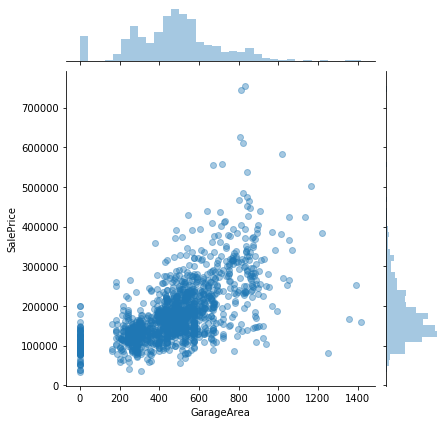

In [27]:
sns.jointplot(num_var['GarageArea'], num_var['SalePrice'], alpha=0.4);

#### 'GarageArea' attribute represents the size of garage in square feet. There is a positive correlation between the sale price and the size of the garage.

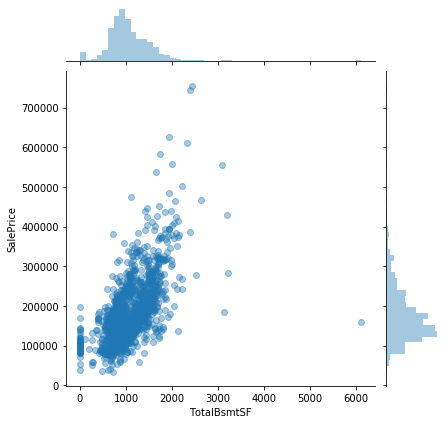

In [28]:
sns.jointplot(num_var['TotalBsmtSF'], num_var['SalePrice'], alpha=0.4);

#### 'TotalBsmtSF' represents the total square feet of basement area. According to the above plot sale price of a house increases when the size of the basement increases. There is a one outlier.

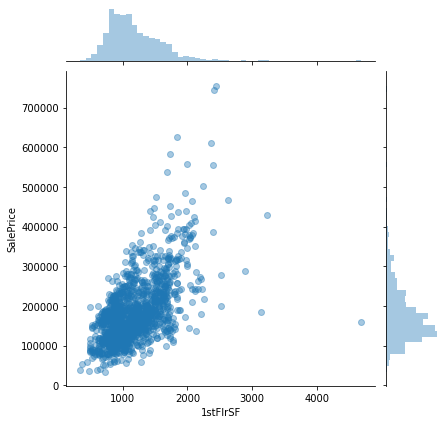

In [29]:
sns.jointplot(num_var['1stFlrSF'], num_var['SalePrice'], alpha=0.4);

#### '1stFlrSF' attribute represents the first floor size in square feet. There is a positive correlation between the 'SalePrice' and '1stFlrSF'. And there are few outliers in the plot.

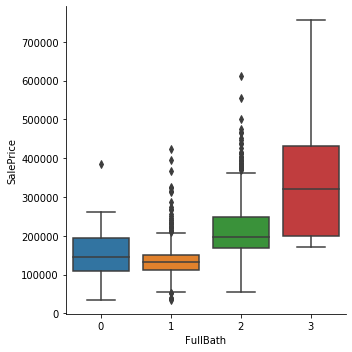

In [34]:
sns.catplot(x='FullBath', y='SalePrice',kind='box',data=train)

#### 'FullBath' attribute represents the number of full bathrooms above grade. According to the plot, when the number of full bathrooms above grade increase from 1 to 3 , the sale price of the house increase. There is a high variance in price when the number of full bathrooms above grade equals to 3.  

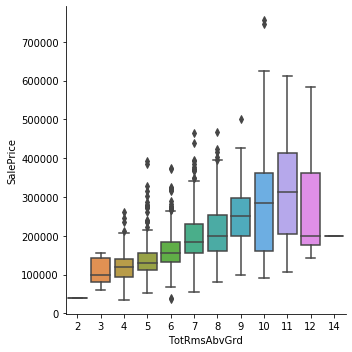

In [35]:
sns.catplot(x='TotRmsAbvGrd', y='SalePrice',kind='box',data=train)

#### 'TotRmsAbvGrd' represents th total rooms above grade. According to the plot the sale price of house and dispersion of house price increases when the total rooms above grade increases from3 to 11. There is decrease in the sale price when 'TotRmsAbvGrd' increase to 12. This can be an outlier.

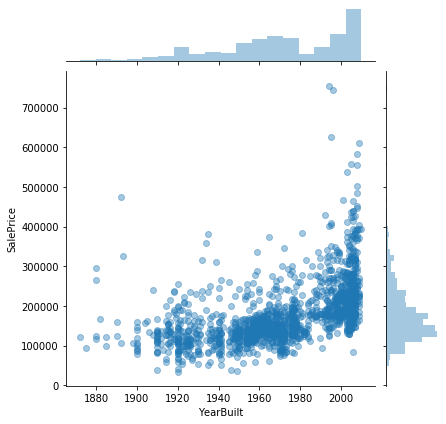

In [60]:
sns.jointplot(num_var['YearBuilt'], num_var['SalePrice'], alpha=0.4);

#### 'YearBuilt' attribute represents the original construction year of the house. There can be seen a increase in the price if the house is recently built.

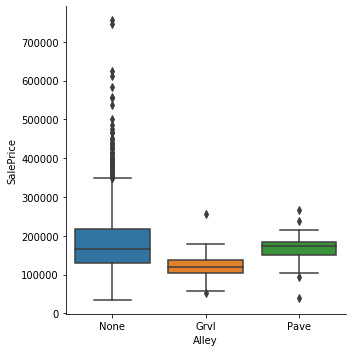

In [31]:
sns.catplot(x='Alley', y='SalePrice',kind='box',data=train)

#### Attribute 'Alley' represents type of alley access to property. 'None' means there is no alley access. According to the above plot if the house has paved alley access the price of the house is higher than the prices of the houses with gravel alley access.

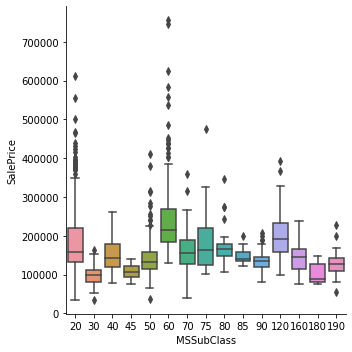

In [61]:
sns.catplot(x='MSSubClass', y='SalePrice',kind='box',data=train)

#### 'MSSubClass' represent the  type of dwelling involved in the sale. According to the plot, there is the highest mean house price when 'MSSubClass' is 60.  'MSSubClass' is 60 when the type of dwelling is '2-STORY 1946 & NEWER'.

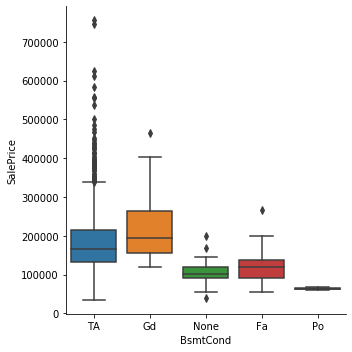

In [62]:
sns.catplot(x='BsmtCond', y='SalePrice',kind='box',data=train)

#### 'BsmtCond' represent the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

#### According to the above plot , there is the highest mean house price when the basement condition is good. The price of the house becomes very low when the basement condition is poor.

### Lasso Regression

In [52]:
X=num_var.drop('SalePrice',axis=1)
Y=num_var.loc[:,'SalePrice']

#### Feature normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Best Model

In [47]:
best_alpha=0
best_score=0
for alpha in [800,900,1000,1050,1100,1150,1175,1180,1190,2000]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    score_train = linlasso.score(X_train_scaled, y_train)
    score_test = linlasso.score(X_test_scaled, y_test)
    if best_score<score_test:
        best_score=score_test
        best_alpha=alpha
(best_score,best_alpha)

(0.717273755695209, 1190)

The best test set accuracy is obtained when alpha equals to 1190.

In [48]:
linlasso = Lasso(alpha=1190, max_iter = 10000).fit(X_train_scaled, y_train)
linlasso.score(X_test_scaled, y_test)

0.717273755695209

The best test set accuracy is 0.7172

In [49]:
linlasso.score(X_train_scaled, y_train)

0.7977956651022415

 Train set accuracy is 0.7977 when alpha equals to 1190

In [50]:
linlasso.coef_

array([ -9370.68056869,      0.        ,      0.        , 157798.52654851,
            0.        ,  13454.95958897,  26911.22248895,      0.        ,
        44663.48364319,      0.        ,      0.        ,  36483.83137625,
         7337.5403688 ,      0.        ,     -0.        , 160507.29044518,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,     -0.        ,      0.        ,  25800.13702033,
           -0.        ,  42282.51187586,   9842.50747964,      0.        ,
            0.        ,     -0.        ,      0.        ,      0.        ,
            0.        ,     -0.        ,     -0.        ,     -0.        ])

In [51]:
X_train.iloc[:,linlasso.coef_!=0].columns

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars',
       'GarageArea'],
      dtype='object')

#### Lasso regression model contains following attributes

    ['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
    'BsmtFinSF1','TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars','GarageArea']